<a href="https://colab.research.google.com/github/SarahJane86/food-sales-predictions/blob/main/FoodSales(PROJECT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Food Sales Predictions (Project)
- Sarah Musselwhite
- July 19, 2022

In [ ]:
import pandas as pd
filename = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR65MSt3WbS2eRLOz6LOKZM9QQed6ELSx80n7rVU0h39w3apF2-a58tMfa0b7zwZ5Uv67ZxBCJ57gvj/pub?gid=1310383789&single=true&output=csv'

In [ ]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Data Cleaning
## July 26, 2022

1. How many rows and columns?

In [ ]:
df.shape

(8523, 12)

2. What are the datatypes of each variable?

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3. Are there duplicates? If so, drop any duplicates.

In [ ]:
df.duplicated().any()

False

4. Identify missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df[df.isna().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


5. Decide on how to address the missing values and do it. (This requires your judgement, explain your choice.)

In [ ]:
df.dropna(subset=['Outlet_Size'], inplace=True)
df.isna().sum() ##I chose to drop outlet_size because it seemed to be a redundant value when you look at Outlet_type.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.dropna(subset=['Item_Weight'], inplace=True)
df.isna().sum() ## I chose to drop the item weight because there are so many different types of items, I did not want to introduce any errors in the data by averaging the weights

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df = df.drop(columns = ['Item_Weight', 'Outlet_Size'])

6. Confirm that there are no missing values after addressing them.

In [ ]:
df.isna().sum() ##Verifying no missing values

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.replace(['LF', 'low fat'], ['Low Fat', 'Low Fat'], inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    3004
Regular    1575
reg          71
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.replace(['reg'], ['Regular'], inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    3004
Regular    1646
Name: Item_Fat_Content, dtype: int64

8.  For any numerical columns, obtain the summary statistics of each (min, max, mean)

 

In [ ]:
##I created a new filter, and removed all object types, so then I was able to 
##find the mean, min and max.
df.dtypes 

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
##dropping unneeded values and creating a new dataset with values I am looking for.
numeric_df = df.drop(columns =['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type'])

In [ ]:
##Verifying that I have the values I am looking for.
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Visibility    4650 non-null   float64
 1   Item_MRP           4650 non-null   float64
 2   Item_Outlet_Sales  4650 non-null   float64
dtypes: float64(3)
memory usage: 145.3 KB


In [ ]:
numeric_df.mean() ##Mean of Numeric values

Item_Visibility         0.060700
Item_MRP              141.716328
Item_Outlet_Sales    2272.037489
dtype: float64

In [ ]:
numeric_df.min() ##Min of Numeric Values

Item_Visibility       0.0000
Item_MRP             31.4900
Item_Outlet_Sales    69.2432
dtype: float64

In [ ]:
numeric_df.max() ##Max of Numeric Values

Item_Visibility          0.188323
Item_MRP               266.888400
Item_Outlet_Sales    10256.649000
dtype: float64

#Data Visualization
## August 3, 2022
- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
5,FDP36,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Tier 3,Supermarket Type2,556.6088


In [ ]:
df['Item_MRP'].head()

0    249.8092
1     48.2692
2    141.6180
4     53.8614
5     51.4008
Name: Item_MRP, dtype: float64

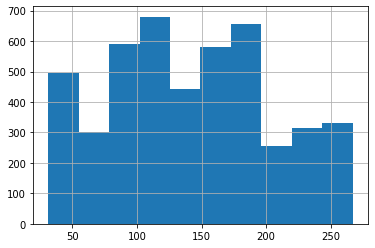

In [ ]:
df['Item_MRP'].hist() ##Histogram to view the distributions of various features in your dataset.

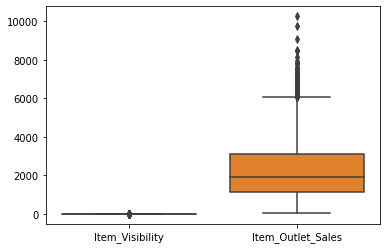

In [ ]:
sns.boxplot(data= df.loc[:,['Item_Visibility', 'Item_Outlet_Sales']]) ##Boxplot to view statistical summaries of various features in your dataset.

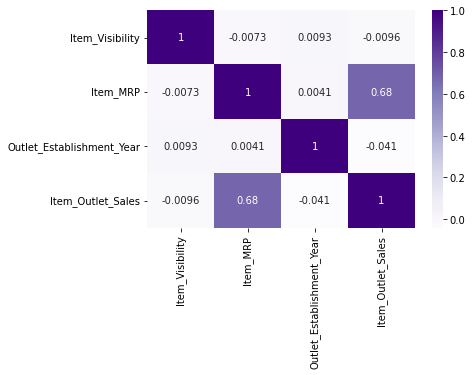

In [ ]:
corr=df.corr()
sns.heatmap(corr, cmap ='Purples', annot = True) ##Heatmap of the correlation between features.